In [1]:
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
def evolutionary_track(Z: float, Y: float, M: str, plot_all: bool = False, plot_single: bool = False):
    """
    """
    
    # Folder path to the data extracted from .gz.tar file
    folder_path = f'evolutionary_tracks/extract/Z{Z}Y{Y}/'
    # Specify the path to your tar.gz file
    file_path = f'evolutionary_tracks/Z{Z}Y{Y}.tar.gz'

    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        print(f"Folder |{folder_path}| already exists.")
    else:
        print(f"Extracting files from {folder_path}...")
        # Open the tar.gz file for reading
        with tarfile.open(file_path, 'r:gz') as tar:
            # Extract all contents to a specific directory (optional)
            tar.extractall(path='evolutionary_tracks/extract')

            # List the contents of the tar.gz file
            file_names = tar.getnames()
            print(f"LOADED contents of {file_path}.")


    # List all files in the folder
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and 'ADD' not in f and '.HB' not in f]

    # Plot evolutionary track of all stars
    if plot_all:
        plt.figure()
        for file_name in file_names:
            df_evolutionary_track = pd.read_csv(f'evolutionary_tracks/extract/Z{Z}Y{Y}/{file_name}', delim_whitespace=True)

            logL = df_evolutionary_track["LOG_L"].tolist()
            logT = df_evolutionary_track["LOG_TE"].tolist()

            logL = [float(x) for x in logL]
            logT = [float(x) for x in logT]

            plt.plot(logT, logL)

        plt.grid(True)
        plt.title(f"All evolutionary tracks for Z={Z}, Y={Y}, M={float(M)}"+ r"$M_{\odot}$")
        plt.gca().invert_xaxis()
        plt.show()

    # Evolutionary track of a single star of mass M
    df_evolutionary_track = pd.read_csv(f'evolutionary_tracks/extract/Z{Z}Y{Y}/Z{Z}Y{Y}OUTA1.74_F7_M{M}.DAT', delim_whitespace=True)
    if plot_single:

        logL = df_evolutionary_track["LOG_L"].tolist()
        logT = df_evolutionary_track["LOG_TE"].tolist()

        logL = [float(x) for x in logL]
        logT = [float(x) for x in logT]

        plt.figure()
        plt.title(f"Evolutionary tracks for Z={Z}, Y={Y}, M={float(M)}"+ r"$M_{\odot}$")
        plt.xlabel(r"$log(T_{eff})$")
        plt.ylabel(r"$log(\frac{L}{L_{\odot}})$")
        plt.plot(logT, logL)
        plt.grid(True)
        plt.gca().invert_xaxis()
        plt.show()
    
    return df_evolutionary_track

Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


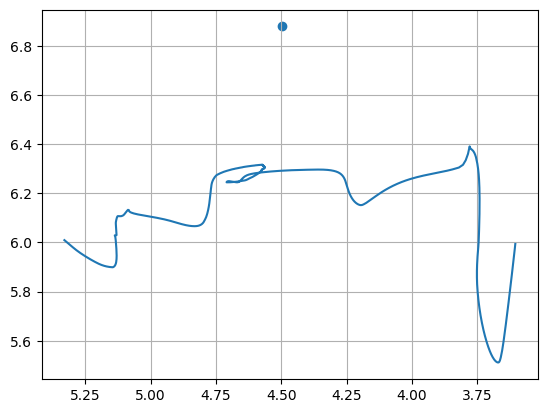

In [3]:
# Cen X-3
L = 6.878254
T = np.log10(31368.0)

df = evolutionary_track(Z=0.02, Y=0.284, M='120.000', plot_all=False, plot_single=False)

logL = df["LOG_L"].tolist()
logT = df["LOG_TE"].tolist()

logL = [float(x) for x in logL]
logT = [float(x) for x in logT]

plt.plot(logT, logL)
plt.scatter([T], [L])
plt.xlabel(r"$log(T_{eff})$")
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$")
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

Effect of metallicity on evolutionary track

Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.03Y0.302/| already exists.
Folder |evolutionary_tracks/extract/Z0.04Y0.321/| already exists.


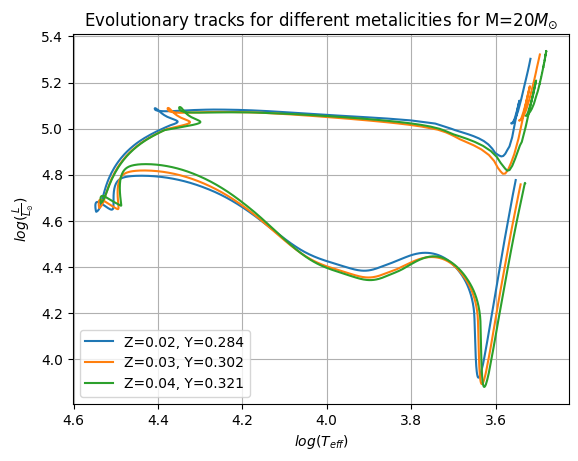

In [14]:
ZY_values = [(0.001, 0.25), (0.0001, 0.249), (0.01, 0.267), (0.0002, 0.249), (0.002, 0.252), 
             (0.02, 0.284), (0.03, 0.302), (0.004, 0.256), (0.04, 0.321), (0.0005, 0.249), 
             (0.006, 0.259), (0.008, 0.263), (0.014, 0.273), (0.017, 0.279)]

ZY_values = [(0.02, 0.284), (0.03, 0.302), (0.04, 0.321)]

for ZY in ZY_values:
    df = evolutionary_track(Z=ZY[0], Y=ZY[1], M='020.000')

    logL = df["LOG_L"].tolist()
    logT = df["LOG_TE"].tolist()

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=f'Z={ZY[0]}, Y={ZY[1]}')

plt.title(f'Evolutionary tracks for different metalicities for M={20}' + r'$M_{\odot}$')
plt.xlabel(r"$log(T_{eff})$")
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$")
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()


Effect of mass on the evolutionary track

Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


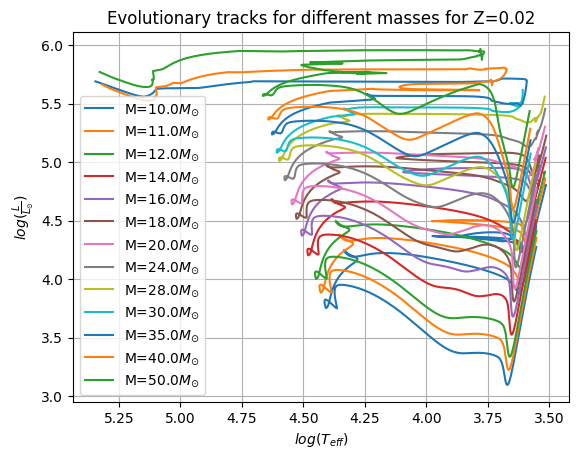

In [19]:
M_values = [10, 11, 12, 14, 16, 18, 20, 24, 28, 30, 35, 40, 50]
M_values = ['{:07.3f}'.format(m) for m in M_values]

for M in M_values:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    logL = df["LOG_L"].tolist()
    logT = df["LOG_TE"].tolist()

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={float(M)}'+r'$M_{\odot}$'))

plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$")
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$")
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()